In [9]:
import obspy as op
import numpy as np
import cartopy.crs as ccrs
from obspy.clients.fdsn import Client
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime

In [10]:
"""
This code is for the east Mediterranean.
"""
westlimit=20.16
southlimit=34.37
eastlimit=30.29
northlimit=39.84
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("2010-01-01T00:00:00") #start time of the request
t3 = op.UTCDateTime("1930-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2015-01-01T00:00:00") #end time of the request
currentDT = datetime.datetime.now()

minMag = 5.0
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html


catalog = client.get_events(starttime=t3, endtime=currentDT, minmagnitude=minMag,
                            minlatitude=southlimit, maxlatitude=northlimit,
                            minlongitude=westlimit, maxlongitude=eastlimit)

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))
print(len(catalog))

Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2023-11-28 07:41:34.337298
Download ended:  2023-11-28 07:41:52.072294
689


In [11]:
"""
this is for all Mediterranean
"""
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))
client = Client("IRIS")
t1 = op.UTCDateTime("2010-01-01T00:00:00") #start time of the request
t3 = op.UTCDateTime("1930-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2015-01-01T00:00:00") #end time of the request
currentDT = datetime.datetime.now()

minMag = 5.0
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html

west_limit = -5.325359
south_limit = 30.292168
east_limit = 43.5
north_limit = 42.851822
"""" 
USA LONG = -114
US LONG = -67
MAX LATITUDE = 49
MIN LATITUDE = 25
"""


catalog = client.get_events(starttime=t3, endtime=currentDT, minmagnitude=minMag,
                            minlatitude=south_limit, maxlatitude=north_limit,
                            minlongitude=west_limit, maxlongitude=east_limit)

                            
currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2023-11-28 07:42:18.350021
Download ended:  2023-11-28 07:42:42.203343


In [12]:
print(len(catalog))

1440


In [13]:
# copy latitude, longitude, depth, and magnitude out of the catalog that they can be plotted below
evlat =[]
evlon =[]
evdep =[]
evmag = []
evmag_2 = []

index = 0

for eve in catalog:
    event = catalog[index]
    org = event.origins
    evlat.append(org[0].latitude)
    evlon.append(org[0].longitude)
    #print(org[0].depth)
    if (org[0].depth==None):
        evdep.append(0.0)
    else:
        evdep.append((org[0].depth) / 1000.0)
    evmag.append((event.magnitudes[0].mag)**4/3)
    evmag_2.append(event.magnitudes[0].mag)
    index+=1

<class 'int'>


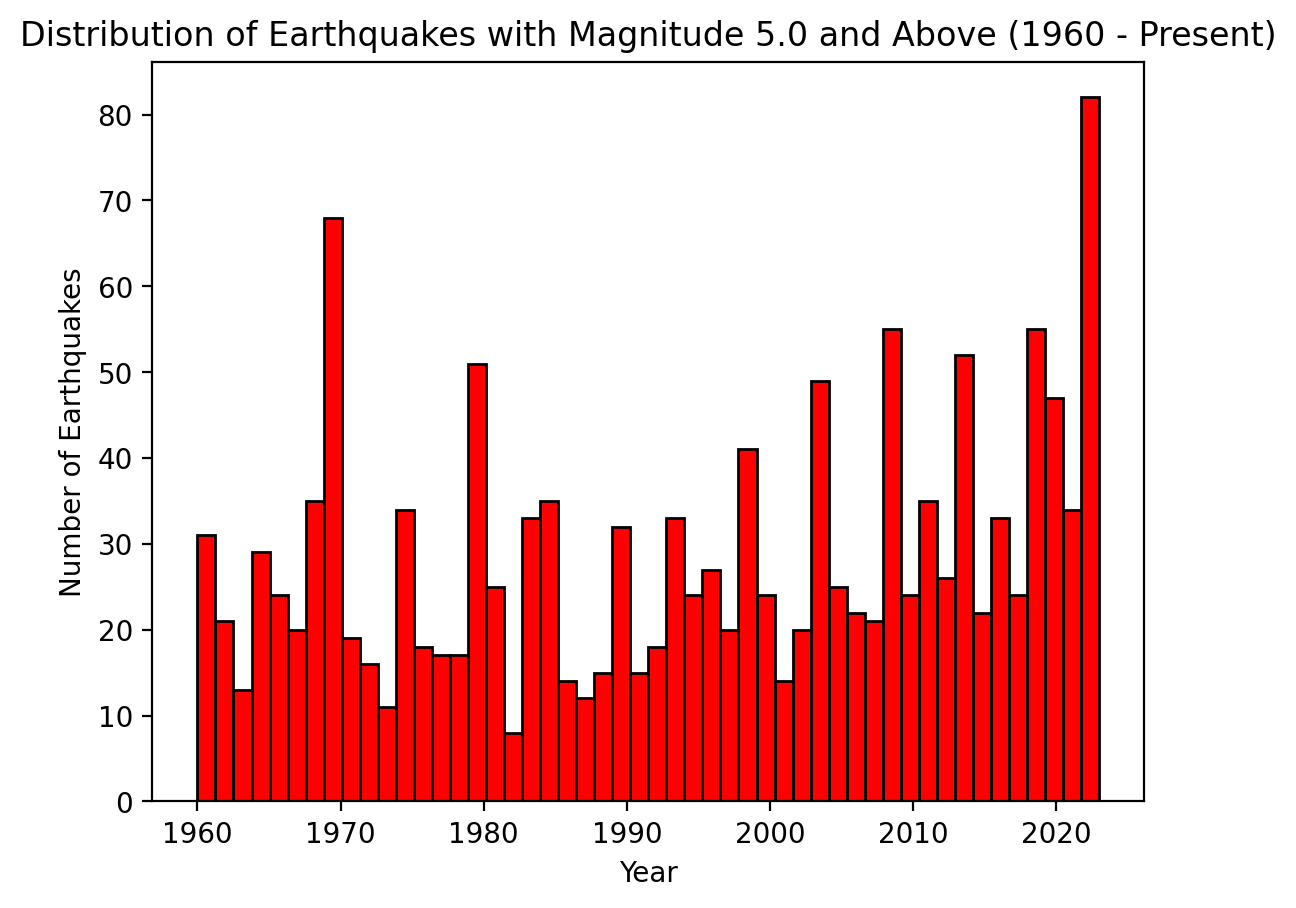

In [14]:
# Create an empty list to store the years of earthquake events
years = []
print(type(event.origins[0].time.year))
# Extract the years from the earthquake events in the catalog
for event in catalog:
    years.append(event.origins[0].time.year)

plt.hist(years, bins=50, alpha=1, color='r', edgecolor='k')
# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Distribution of Earthquakes with Magnitude 5.0 and Above (1960 - Present)')
# Show the histogram
plt.show()


45
[2023, 2023, 2023, 2023, 2022, 2022, 2021, 2021, 2020, 2020, 2020, 2019, 2018, 2017, 2017, 2016, 2016, 2015, 2015, 2014, 2014, 2013, 2013, 2013, 2012, 2011, 2011, 2010, 2010, 2009, 2009, 2008, 2008, 2008, 2008, 2008, 2008, 2006, 2004, 2003, 2003, 2003, 2002, 2002, 2001]


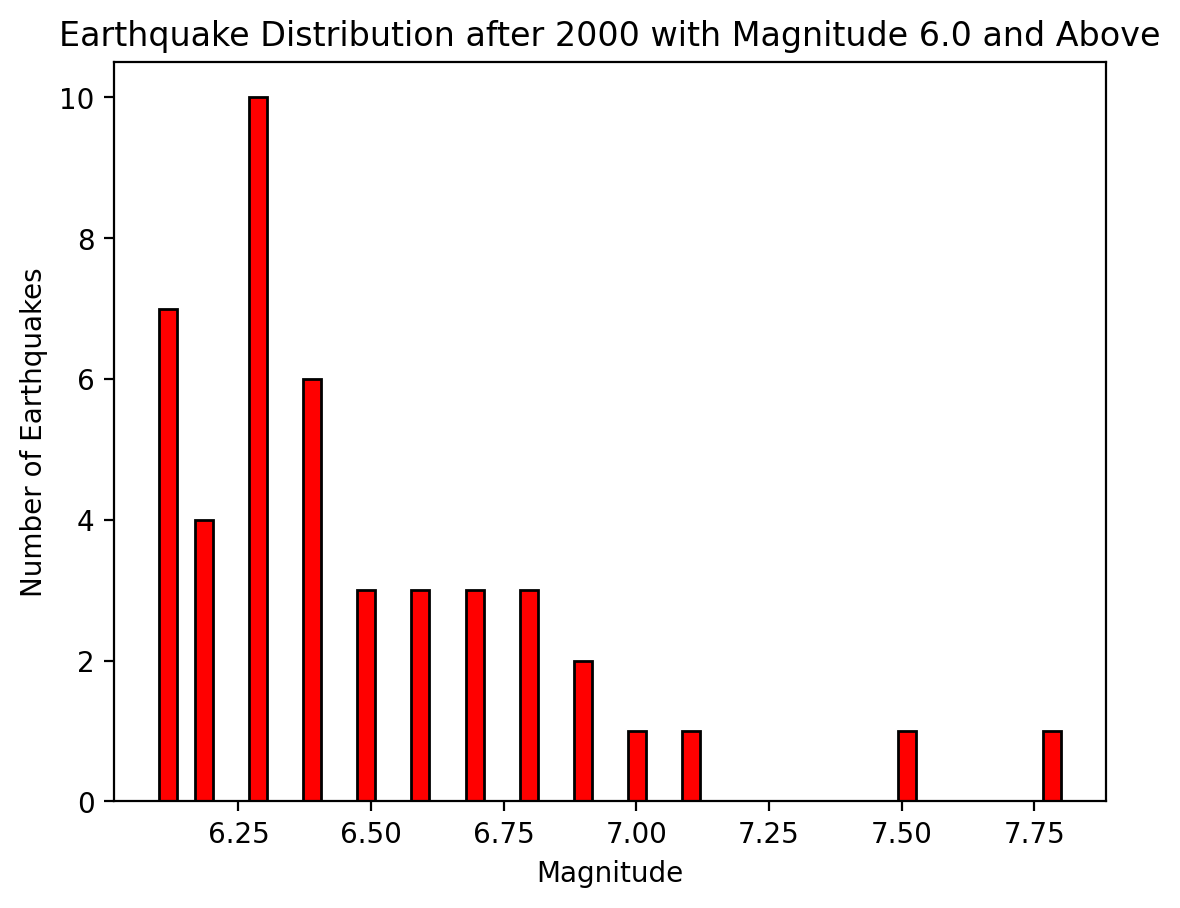

In [15]:
# Create an empty list to store the years of earthquake events
mags = []
year = []
# Extract the years from the earthquake events in the catalog
for event in catalog:
    if (event.origins[0].time.year > 2000 and event.magnitudes[0].mag > 6):
        mags.append(event.magnitudes[0].mag)
        year.append(event.origins[0].time.year)
plt.hist(mags, bins=50, alpha=1, color='r', edgecolor='k')

# Set labels and title
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Distribution after 2000 with Magnitude 6.0 and Above')
# Show the histogram
print(len(mags))
print(year)
plt.show()


34



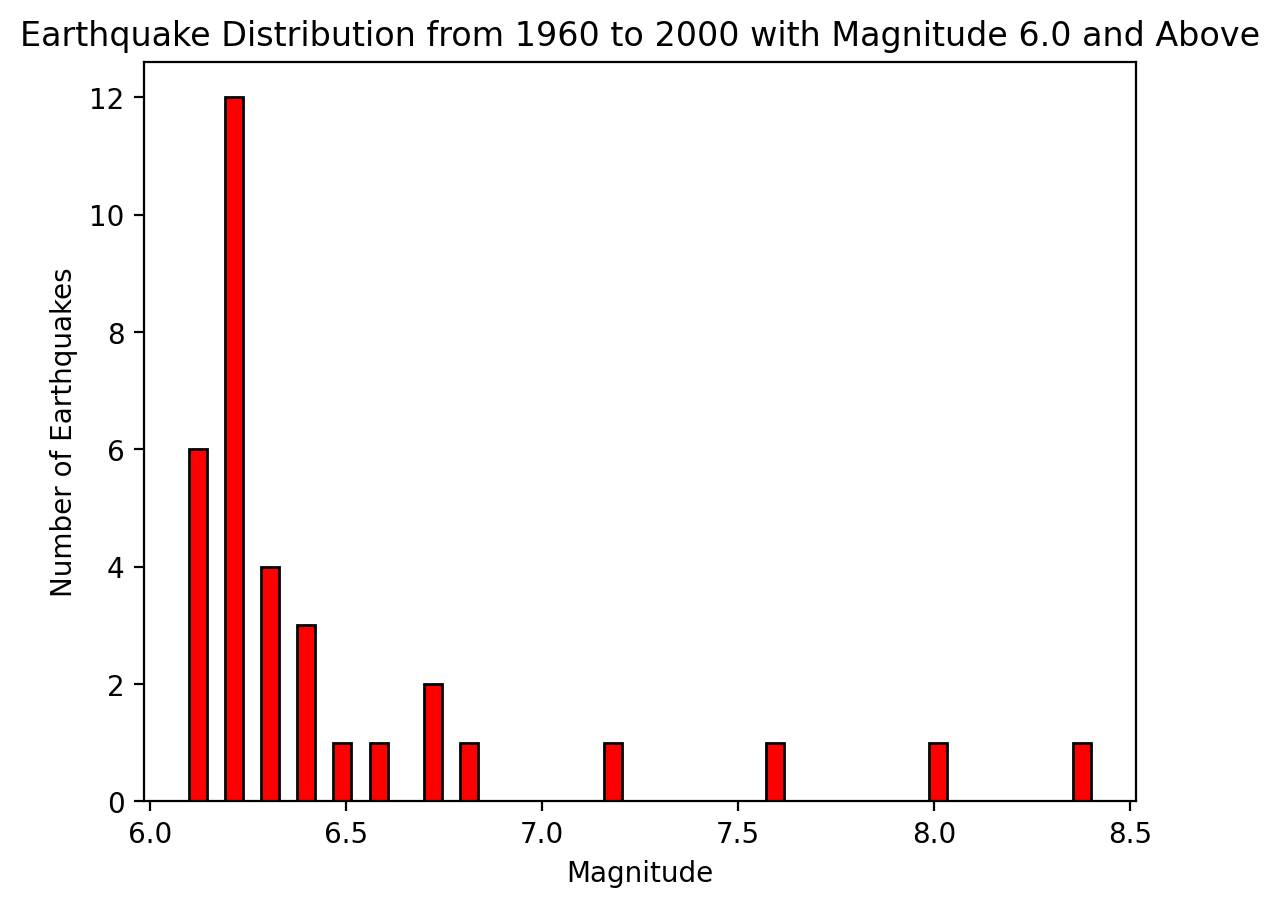

In [16]:
# Create an empty list to store the years of earthquake events
mags = []

# Extract the years from the earthquake events in the catalog
for event in catalog:
    if (event.origins[0].time.year < 2000 and event.magnitudes[0].mag > 6):
        mags.append(event.magnitudes[0].mag)

plt.hist(mags, bins=50, alpha=1, color='r', edgecolor='k')
# Set labels and title
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Distribution from 1960 to 2000 with Magnitude 6.0 and Above')
# Show the histogram
print(len(mags))
print()
plt.show()


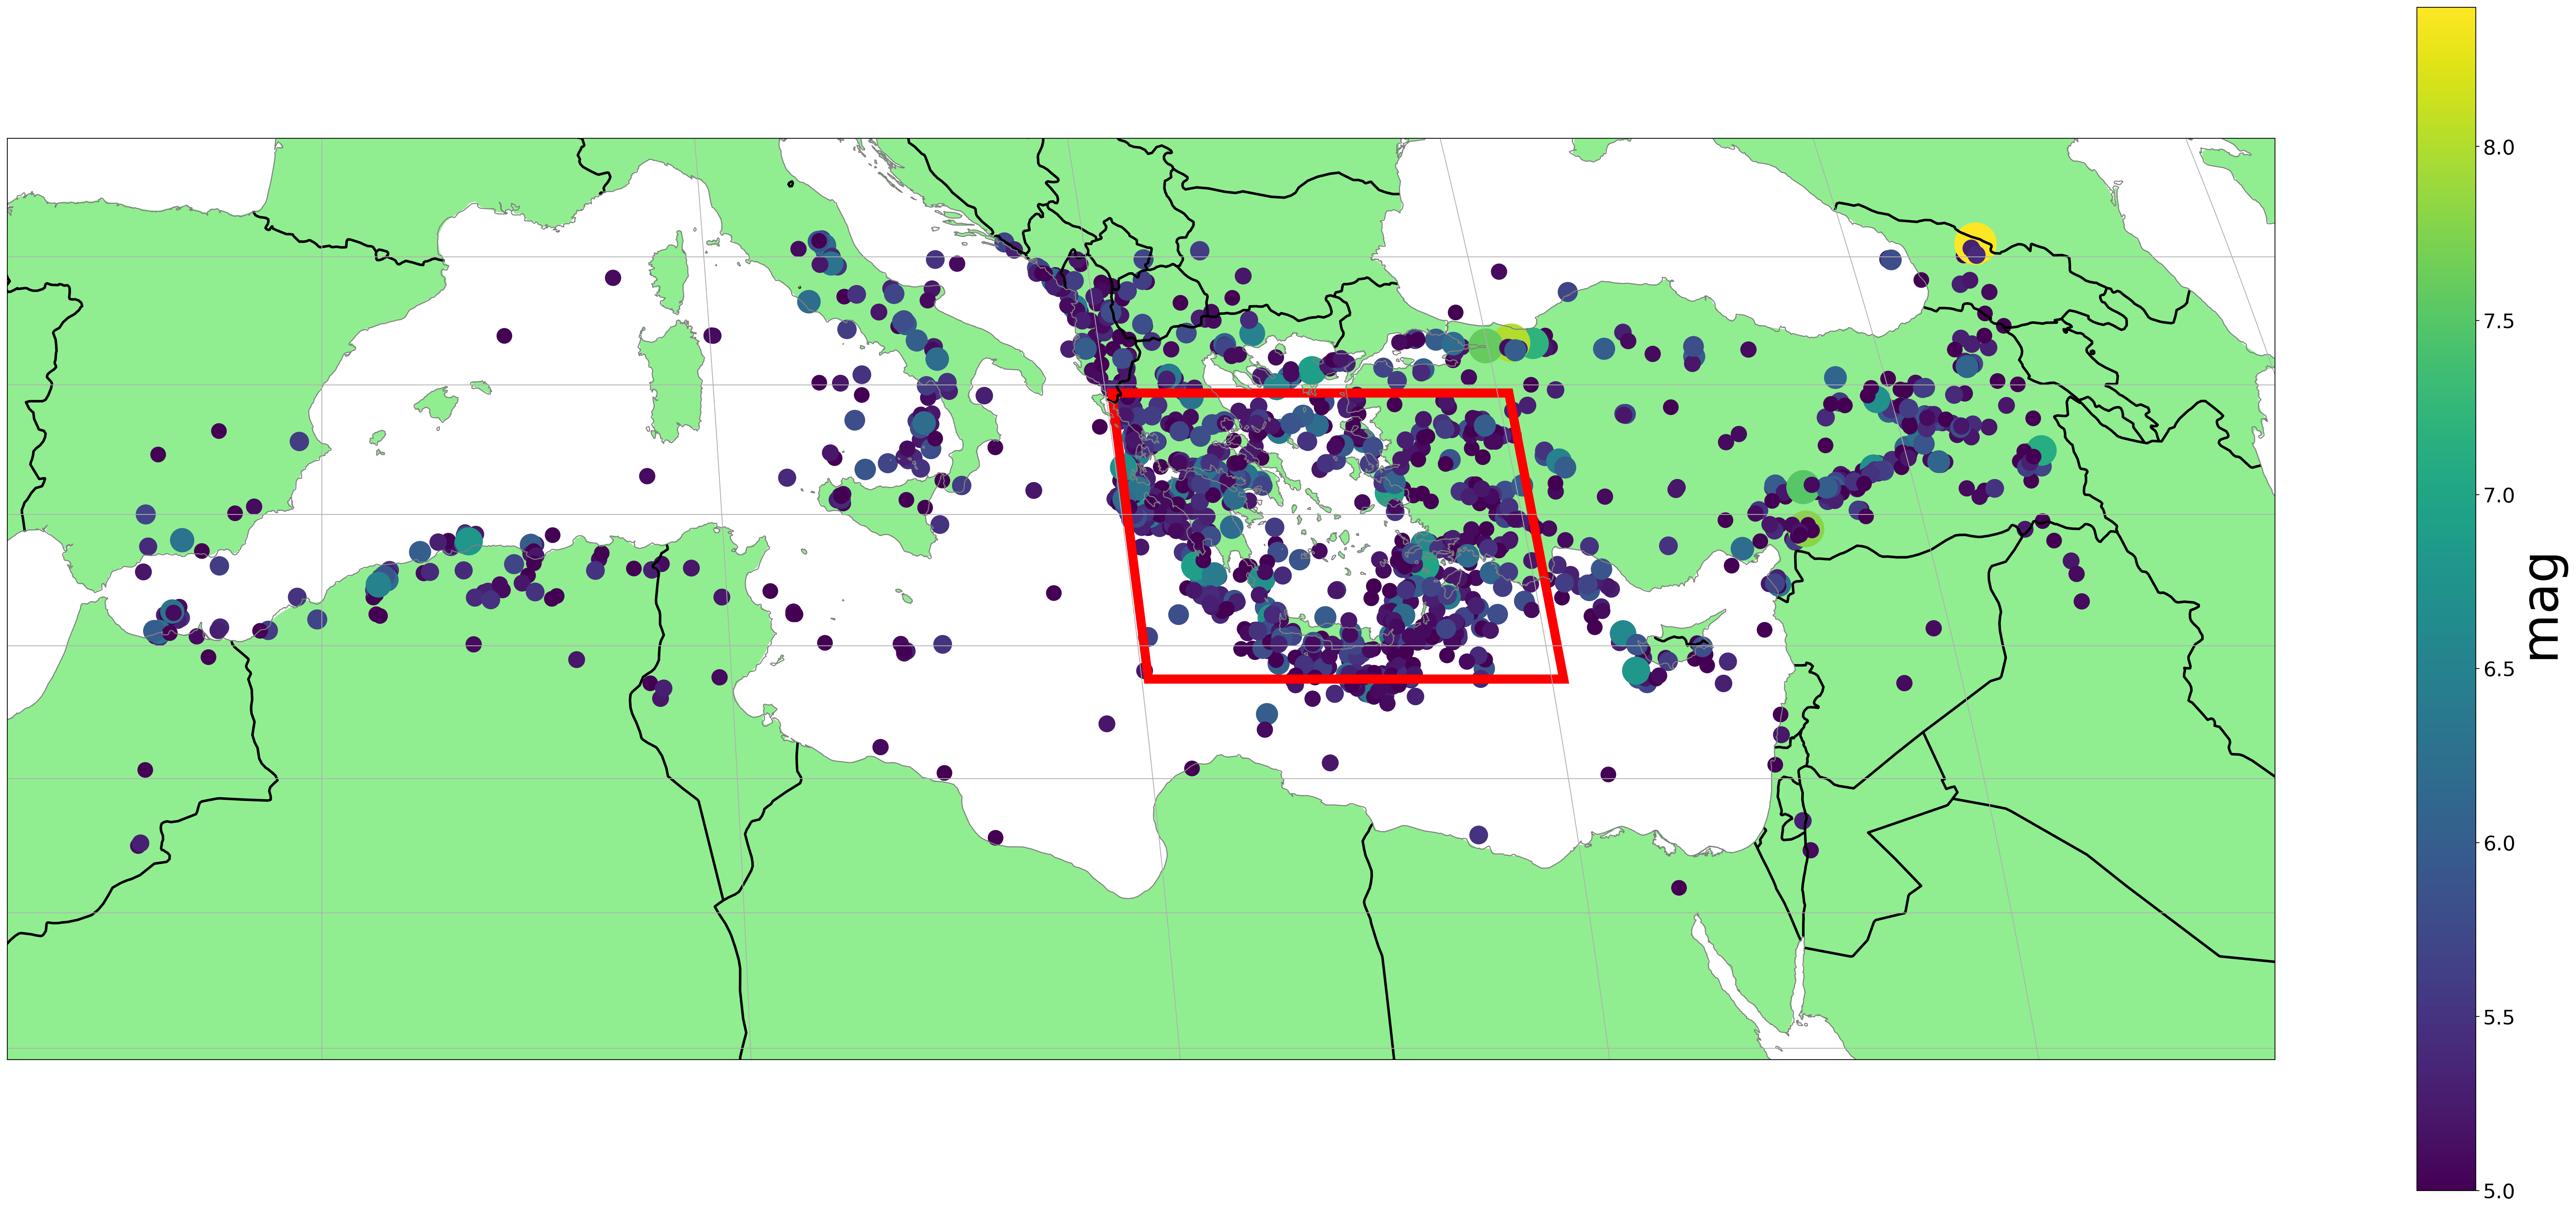

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(50, 30))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=0))

events = ax.scatter(evlon, evlat, c=evmag_2, s=evmag, transform=ccrs.PlateCarree())

rectangle_coords = [34.37, 39.84, 20.16, 30.29]  
rect = mpatches.Rectangle((rectangle_coords[2], rectangle_coords[0]),
                          rectangle_coords[3] - rectangle_coords[2],
                          rectangle_coords[1] - rectangle_coords[0],
                          edgecolor='red', linewidth=9, facecolor='none',
                          transform=ccrs.PlateCarree())
ax.add_patch(rect)

#events = ax.scatter(evlon, evlat, c=evmag, s=evmag, cmap='viridis', alpha=0.7, transform=ccrs.PlateCarree())

region_limits = {
    'min_lon': -7.325359,
    'max_lon': 45.5,
    'min_lat': 27.292168,
    'max_lat': 44.851822
}

#  extent of the map to cover the specified region
ax.set_extent([region_limits['min_lon'], region_limits['max_lon'],
               region_limits['min_lat'], region_limits['max_lat']], crs=ccrs.PlateCarree())



ax.add_feature(cfeature.LAND, facecolor='lightgreen')

ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', linewidth=2.5)


ax.coastlines(resolution='10m', color='gray')
ax.gridlines()

cbar = plt.colorbar(events, shrink=0.7)
cbar.set_label('mag ', fontsize=50)
cbar.ax.tick_params(labelsize=20)


plt.show()


In [1]:
minMag = 5.0
west_limit = -5.325359
south_limit = 30.292168
east_limit = 43.5
north_limit = 42.851822

for i in range(1961, 2025, 3):
    currentDT = datetime.datetime.now()
    print ('Download began: ',str(currentDT))
    client = Client("IRIS")
    t1 = op.UTCDateTime("1960-01-01T00:00:00") #start time of the request
    print(i)
    if i == 2024:
        t2 = datetime.datetime.now()
    else:
        t2 = op.UTCDateTime(str(i)+"-01-01T00:00:00") #end time of the request
    currentDT = datetime.datetime.now()

    catalog = client.get_events(starttime=t1, endtime=t2, minmagnitude=minMag,
                                minlatitude=south_limit, maxlatitude=north_limit,
                                minlongitude=west_limit, maxlongitude=east_limit)
    plt.gcf()
    currentDT = datetime.datetime.now()
    print ('Download ended: ',str(currentDT))
    plt.rcParams['figure.figsize'] = [15, 7]
    out=r"C:\Users\la-caee\Desktop\coding\final\pic" + str(i) + ".png"
    catalog.plot(projection='local', resolution="i", label=None, continent_fill_color="g", outfile=out)
    plt.show()
    

NameError: name 'datetime' is not defined

In [17]:
"""
used this script to generate the ANIMATION FILE,  concates all png file and creats the animation

ffmpeg -r 1 -f image2 -s 1920x1388 -start_number 1 -i pic%04d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -vcodec libx264 -crf 15 -pix_fmt yuv420p test6.mp4
"""

'\nused this script to generate the ANIMATION FILE,  concates all png file and creats the animation\n\nffmpeg -r 1 -f image2 -s 1920x1388 -start_number 1 -i pic%04d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -vcodec libx264 -crf 15 -pix_fmt yuv420p test6.mp4\n'